Data:
https://www.kaggle.com/uciml/pima-indians-diabetes-database

Load the dataset<p>
Perform exploratory data analysis


1. Target variable distribution
2. Examine missing values
3. Examine data types
4. Examine data distribution
5. Examine data intercorrelations


<p>
5 pts.



In [78]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [62]:
diabetes_data = pd.read_csv('diabetes.csv')

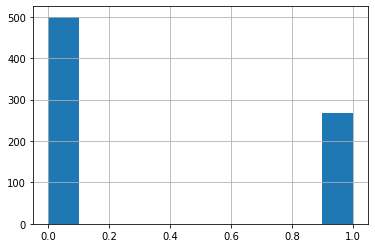

In [39]:
#Exploratory analysis
# Evaluate target variable distribution

diabetes_data.Outcome.hist()

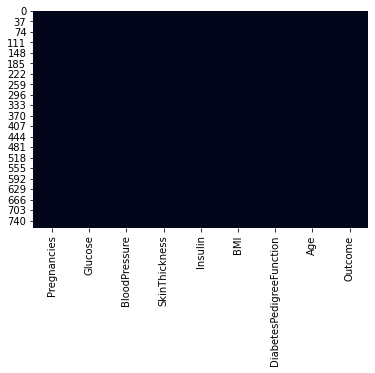

In [33]:
sns.heatmap(diabetes_data.isnull(), cbar=False)

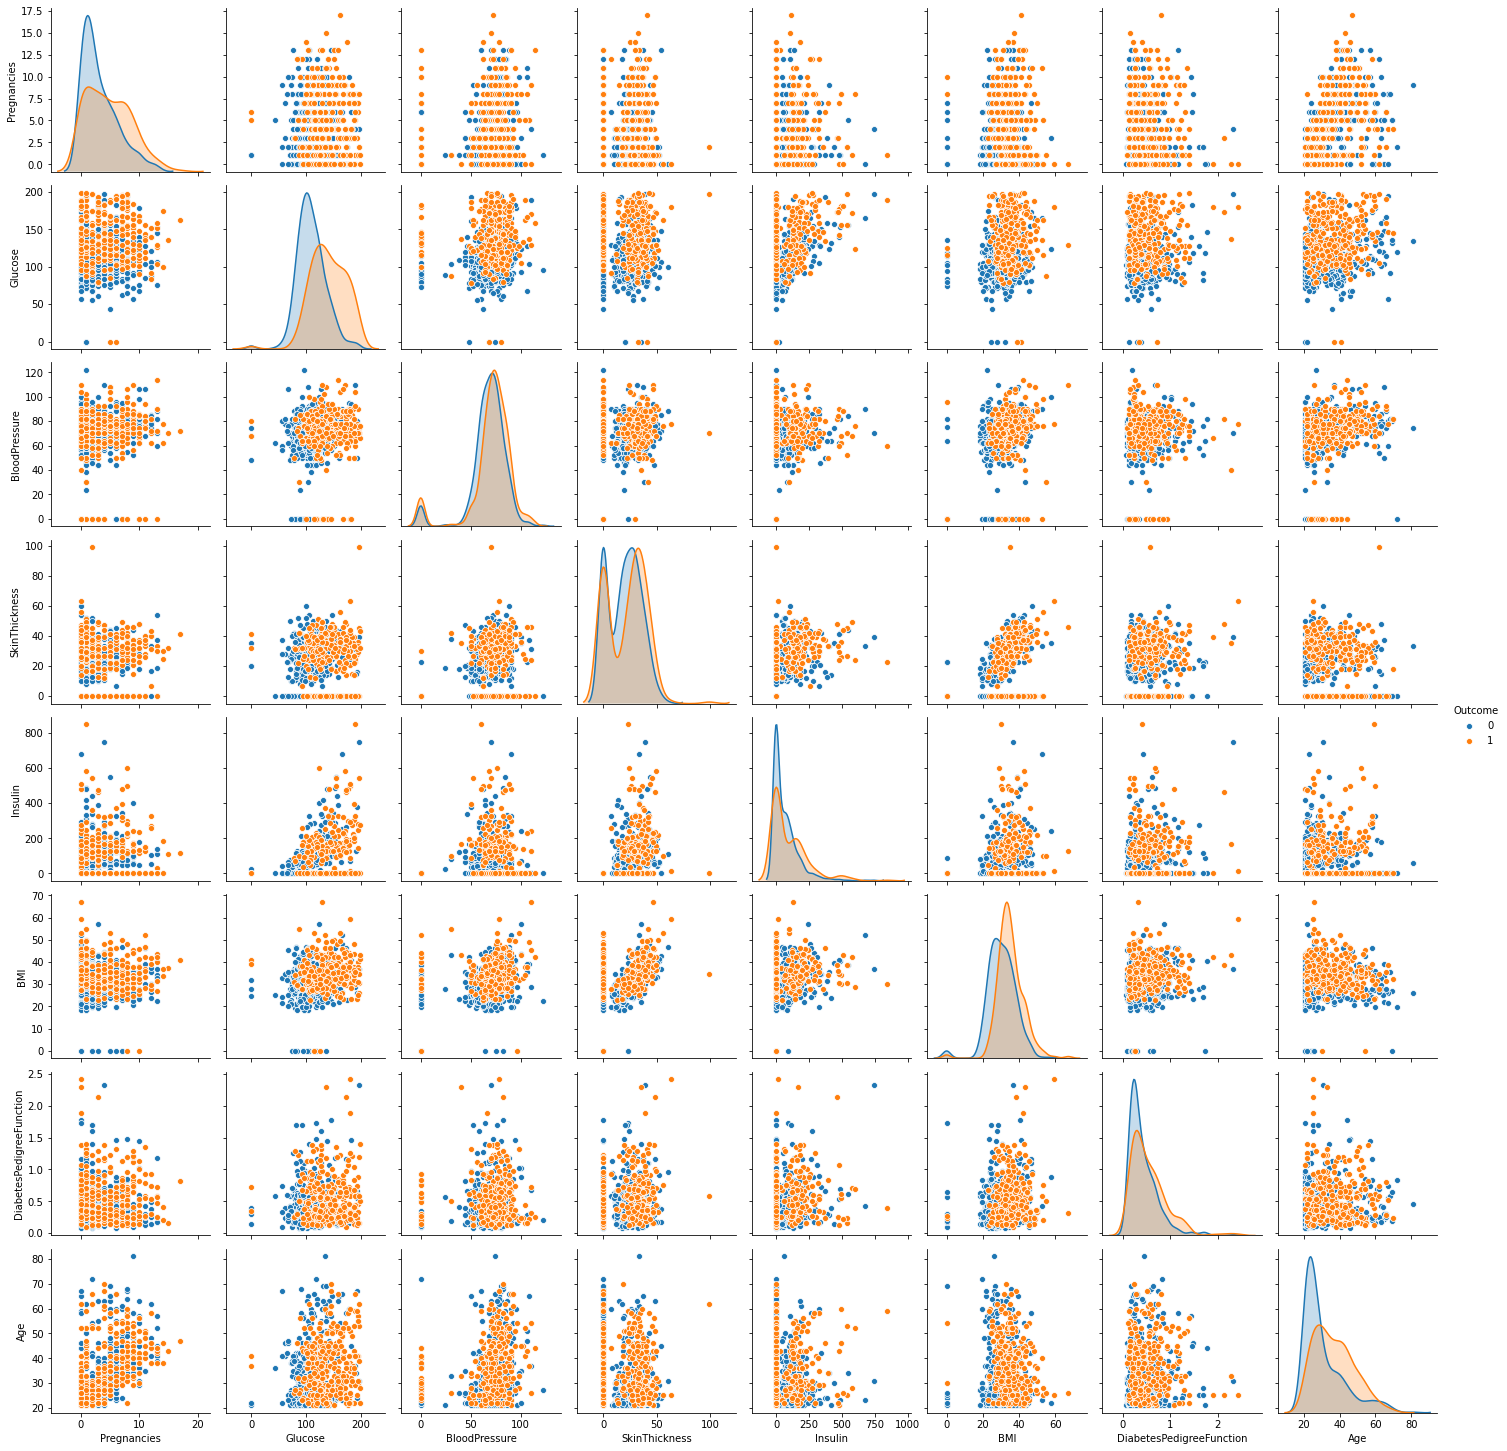

In [34]:
sns.pairplot(diabetes_data, hue= 'Outcome')

In [35]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Split data 70/30 into training and test datasets.<p>
Build a logistic regression model to predict diabetes<p>

5 pts.

In [64]:
x = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [65]:
#Split data 70/30 into training and test datasets.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [66]:
#Build a logistic regression model to predict diabetes

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluate model performance. <p>
Display the confusion matrix.<p>
Report the following metrics: 

1.   ROC AUC
2.   Accuracy
<li>Recall
<li>Precision
<li>Display the ROC curve.
<p>

5 pts.





In [69]:
#Evaluate model performance.

y_pred = logmodel.predict(X_test)

In [70]:
y_test[:10]

285    0
101    0
581    0
352    0
726    0
472    0
233    0
385    0
556    0
59     0
Name: Outcome, dtype: int64

In [71]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

#Display the confusion matrix.

confusion_matrix(y_test,y_pred)

array([[132,  14],
       [ 38,  47]])

In [73]:
#Report the following metrics: ROC AUC, Accuracy, Recall, Precision


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [59]:
logmodel.coef_

array([[ 9.43520769e-02,  2.55430049e-02, -1.98573647e-02,
        -1.54562381e-03, -6.87841751e-05,  5.63108117e-02,
         3.87085015e-01,  8.66999687e-03]])

In [101]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())



Optimization terminated successfully.
         Current function value: 0.602566
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.061     
Dependent Variable:    Outcome            AIC:                663.1556  
Date:                  2020-09-10 18:37   BIC:                697.4436  
No. Observations:      537                Log-Likelihood:     -323.58   
Df Model:              7                  LL-Null:            -344.51   
Df Residuals:          529                LLR p-value:        5.5031e-07
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.0959   0.0337  2.8426 0

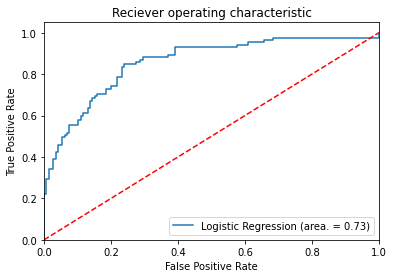

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

#Display the ROC curve

logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area. = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Determine which features have no effect on the Outcome (Hint: you will need to use statsmodels). <p>
Exclude  features with non-statistically significant effects in the model, rebuild the model and assess how the reduced feature set affects model performance.

5 pts.

> When the parameter coeffecient is above .05 (above 5%), it does not have a statistically significant effect on the outcome. 

> Pregnancies, Gluecose, Insulin, BMI, and Diabetes Pedigree Function had postive effect on outcome. Blood Pressure, Skin Thickness, and Age had a negative effect. 

> Though the only variables statistically significant are Skin Thickness, Insulin, Bmi, Diabetes Pedigree Function, and Age

In [95]:
diabetes_data_clean = diabetes_data.drop(['Pregnancies','Glucose','BloodPressure'], axis=1)

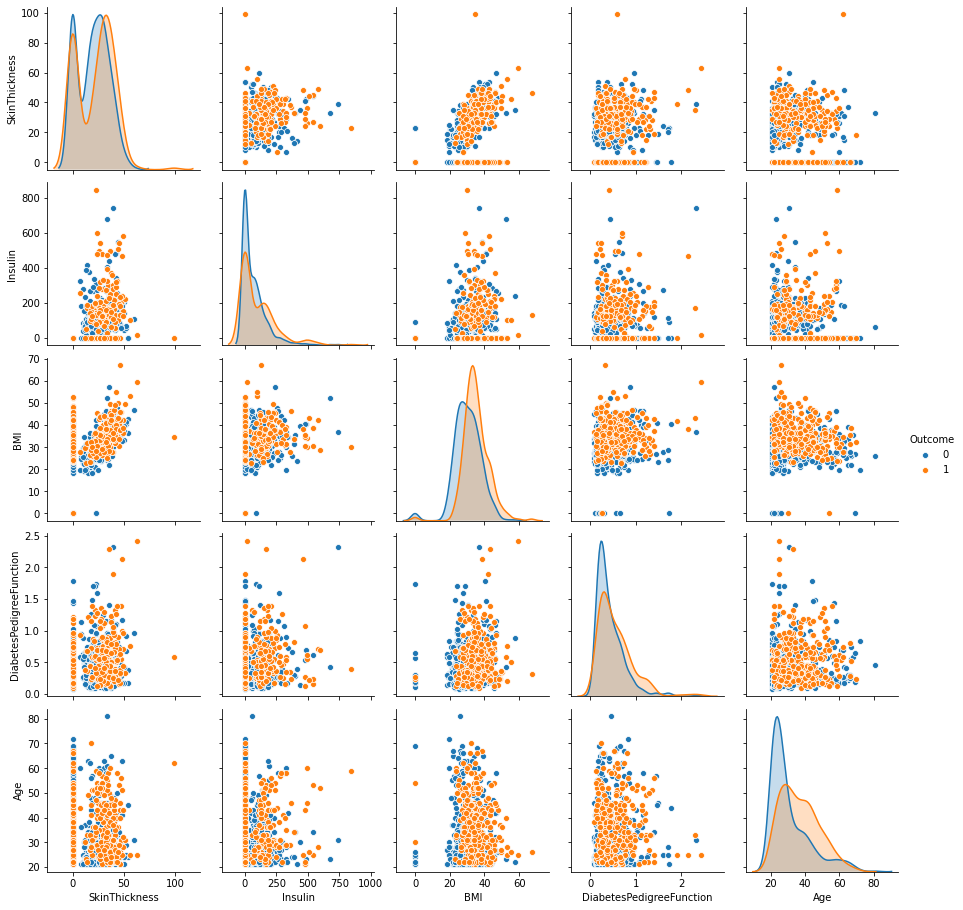

In [117]:
sns.pairplot(diabetes_data_clean, hue= 'Outcome')

In [96]:
x2 = diabetes_data_clean.drop('Outcome', axis=1)
y2 = diabetes_data_clean['Outcome']

In [118]:
y2_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [119]:
y2_test[:10]

285    0
101    0
581    0
352    0
726    0
472    0
233    0
385    0
556    0
59     0
Name: Outcome, dtype: int64

In [97]:
#Split data 70/30 into training and test datasets.

X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=1)

In [110]:
#Build a logistic regression model to predict diabetes

logmodel_alt = LogisticRegression(solver='liblinear')
logmodel_alt.fit(X2_train,y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
#Evaluate model performance.

y2_pred = logmodel_alt.predict(X2_test)

In [112]:
#Display the confusion matrix.

confusion_matrix(y2_test,y2_pred)


array([[132,  14],
       [ 59,  26]])

In [113]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       146
           1       0.65      0.31      0.42        85

    accuracy                           0.68       231
   macro avg       0.67      0.60      0.60       231
weighted avg       0.68      0.68      0.65       231



In [114]:
logmodel_alt.coef_

array([[-0.01355009,  0.00248379,  0.06923688,  0.40702516,  0.03049538]])

In [116]:
logit_model2=sm.Logit(y2_train, X2_train)
logmodel_2=logit_model2.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.654244
         Iterations 5
                            Results: Logit
Model:                  Logit              Pseudo R-squared:   -0.020  
Dependent Variable:     Outcome            AIC:                712.6577
Date:                   2020-09-10 18:39   BIC:                734.0877
No. Observations:       537                Log-Likelihood:     -351.33 
Df Model:               4                  LL-Null:            -344.51 
Df Residuals:           532                LLR p-value:        1.0000  
Converged:              1.0000             Scale:              1.0000  
No. Iterations:         5.0000                                         
-----------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------------
SkinThickness            -0.0130   0.0071 -1.8260 0.0679 -0.026

> After rebuilding the model, we see that BMI now has a negative effect. The model used before implied BMI had a positive effect on the variable "Outcome," and logicially that didn't make any sense. 

> Furthermore, looking at insulin, it is now statisticlly insignificant. Which makes more sense, as people with diabetes usually have low insulin. 